<a href="https://colab.research.google.com/github/kutaydemiralay/Humanoid-Robot-Movement-Classification-with-PCA/blob/main/HW2_KutayDemiralay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code helps you to load and visualize the data (skeleton) in 3D xyz coordinates.


In [ ]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
#Download Library

In [ ]:
#Compiling all the train samples into a matrix X_train
fname = ["walking_2","walking_3", "walking_4","walking_5","jumping_1","jumping_2","jumping_3","jumping_4","jumping_5", "running_1","running_2","running_3","running_4","running_5" ]

# Define the folder where the motion data is stored
folder = '/content/drive/MyDrive/train/'

X_train=np.zeros (shape=[114,100])

X_train=np.load((folder+"walking_1"+".npy")) #initializing compile process

for name in fname:
    value= np.load((folder+name+".npy"))
    X_train= np.hstack((X_train,value))
# Compile all the train samples into a matrix X_train

print("Shape of X_train:", X_train.shape)
print(X_train)

Shape of X_train: (114, 1500)
[[ 8.37469697e-02  7.62334839e-02  7.07266107e-02 ...  1.52190700e-01
   1.69395506e-01  1.85640782e-01]
 [ 1.14693083e-01  1.07635967e-01  1.01648435e-01 ...  1.51954651e-01
   1.70147091e-01  1.87446848e-01]
 [-2.18185282e+00 -2.17923594e+00 -2.17784309e+00 ... -2.28637552e+00
  -2.28087354e+00 -2.27521682e+00]
 ...
 [ 4.30476387e+02  4.29316536e+02  4.29546498e+02 ...  3.13859956e+02
   3.19975256e+02  3.17101756e+02]
 [-1.62000436e+00 -2.39185355e+00 -3.42141797e+00 ... -5.52496886e+01
  -6.84019801e+01 -7.13617088e+01]
 [-1.49678823e+02 -1.51470563e+02 -1.52352970e+02 ...  2.79590353e+01
   4.37435490e+01  6.00343979e+01]]


In [ ]:
#SVD of X_train
X_reshaped=X_train
centered_data = X_reshaped - np.mean(X_reshaped, axis=1)[:, None]

dU, ds1, dVt = np.linalg.svd(centered_data)

print(dU.shape, ds1.shape, dVt.shape )

(114, 114) (114,) (1500, 1500)


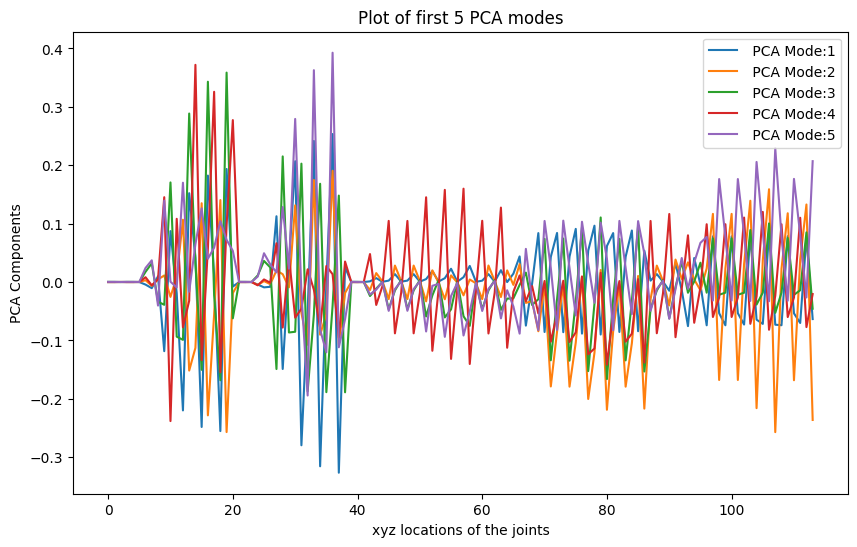

In [ ]:
# Plotting the first 5 PCA modes in xyz space.
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(5):
    ax.plot(dU[:, i], label=f' PCA Mode:{i+1}')

# Add labels and legend
ax.set_xlabel('xyz locations of the joints')
ax.set_ylabel('PCA Components')
ax.set_title('Plot of first 5 PCA modes')
ax.legend()

# Show the plot
plt.show()

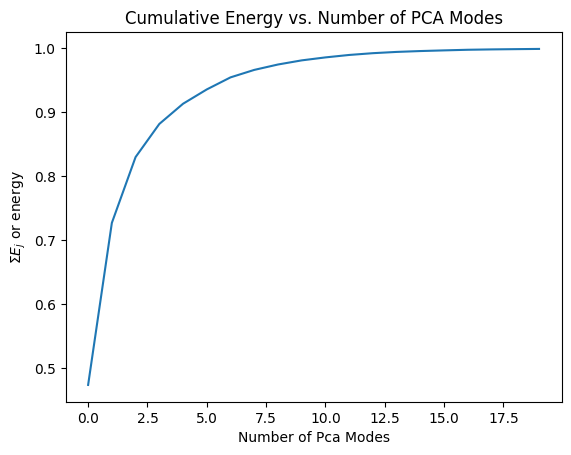

Number of PCA modes: 0, Cumulative Energy: 0.4733607298970359
Number of PCA modes: 1, Cumulative Energy: 0.7265889869301236
Number of PCA modes: 2, Cumulative Energy: 0.8294679372039523
Number of PCA modes: 3, Cumulative Energy: 0.8812047585593906
Number of PCA modes: 4, Cumulative Energy: 0.9127918167857979
Number of PCA modes: 5, Cumulative Energy: 0.9351623692388611
Number of PCA modes: 6, Cumulative Energy: 0.9540023117689306
Number of PCA modes: 7, Cumulative Energy: 0.965674947069315
Number of PCA modes: 8, Cumulative Energy: 0.9741173127532752
Number of PCA modes: 9, Cumulative Energy: 0.9805772963852853
Number of PCA modes: 10, Cumulative Energy: 0.9852222122645039
Number of PCA modes: 11, Cumulative Energy: 0.989037266430196
Number of PCA modes: 12, Cumulative Energy: 0.9918129226205582
Number of PCA modes: 13, Cumulative Energy: 0.9937884365641143
Number of PCA modes: 14, Cumulative Energy: 0.9951443204507404
Number of PCA modes: 15, Cumulative Energy: 0.9961855538620563
Numb

In [ ]:
E = np.power(ds1,2)/np.sum(np.power(ds1,2)) #Energy
plt.plot(np.cumsum(E)[:20]) #Cumulative Energy
plt.xlabel('Number of Pca Modes')
plt.ylabel('$\Sigma E_j$ or energy')
plt.title('Cumulative Energy vs. Number of PCA Modes')  # Corrected the function name
plt.show()

for i, energy_value in enumerate(np.cumsum(E)):
    print(f"Number of PCA modes: {i}, Cumulative Energy: {energy_value}")


[[-7.59503833e-05 -2.60327466e-05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.82506679e-05 -3.84920703e-05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.25502874e-06  5.02839206e-05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-7.01362285e-02  3.84925718e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.73872054e-02  1.32786206e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.34251183e-02 -2.36219015e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


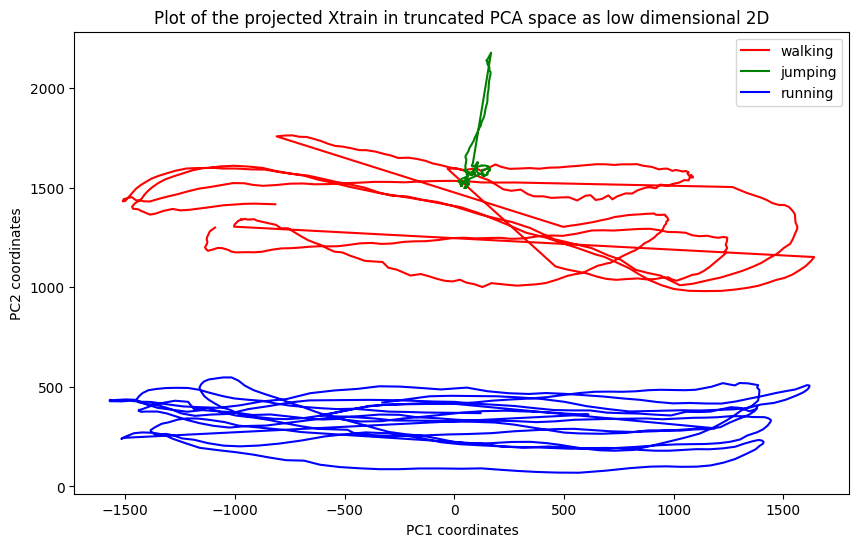

In [ ]:

X_reshaped1=X_train
centered_data1 = X_train - np.mean(X_train, axis=1)[:, None]
dU, ds1, dVt = np.linalg.svd(centered_data1)
ds_approx = ds1
dU2=dU
dU2[:, 2:None]=0
# Now the every column except first 2 of dU are set to zero
print(dU2)

X_PROJECTION = np.dot(dU2.T, X_reshaped1) #Truncated the PCA modes to 2 modes
# plotting the projected 𝑋𝑡𝑟𝑎𝑖𝑛 in truncated PCA space as low dimensional 2D (PC1,PC2 coordinates)
#Used Differenc colors for different movements

fig, ax = plt.subplots(figsize=(10, 6))
# Plot x_projection1 in blue
plot1=ax.plot(X_PROJECTION[0, 0:500], X_PROJECTION[1, 0:500],label='walking', color='red')

# Plot x_projection2 in orange
plot1=ax.plot(X_PROJECTION[0, 500:1000], X_PROJECTION[1, 500:1000], label='jumping', color='green')

# Plot x_projection3 in green
plot1=ax.plot(X_PROJECTION[0, 1000:1500], X_PROJECTION[1, 1000:1500], label='running', color='blue')

# Add labels and legend
ax.set_xlabel('PC1 coordinates')
ax.set_ylabel('PC2 coordinates')
ax.set_title('Plot of the projected Xtrain in truncated PCA space as low dimensional 2D')
ax.legend()

# Show the plot
plt.show()


[[-7.59503833e-05 -2.60327466e-05  2.52825223e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.82506679e-05 -3.84920703e-05  2.50975239e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.25502874e-06  5.02839206e-05  3.75511753e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-7.01362285e-02  3.84925718e-02 -1.40474115e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.73872054e-02  1.32786206e-01  8.50478634e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.34251183e-02 -2.36219015e-01 -4.57056257e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


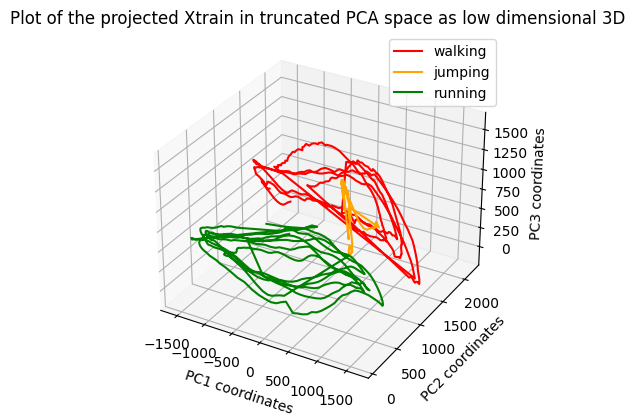

In [ ]:

X_reshaped2=X_train
centered_data2 = X_reshaped2 - np.mean(X_train, axis=1)[:, None]
dU, ds1, dVt = np.linalg.svd(centered_data2)
ds_approx = ds1
dU3=dU
dU3[:, 3:None]=0
# Now the every column except first 3 of dU are set to zero
print(dU3)

X_PROJECTION = np.dot(dU3.T, X_reshaped1)

#plotting the projected 𝑋𝑡𝑟𝑎𝑖𝑛 in truncated PCA space as low dimensional  3D (PC1,PC2,PC3 coordinates)

#Used Differenc colors for different movements


#fig, ax = plt.subplots(figsize=(10, 6))
ax =plt.figure(). add_subplot(projection='3d')

# Plot x_projection1 in blue
plot1=ax.plot(X_PROJECTION[0, 0: 500], X_PROJECTION[1, 0:500], X_PROJECTION[2, 0:500],label='walking', color='red')

# Plot x_projection2 in orange
plot1=ax.plot(X_PROJECTION[0, 500:1000], X_PROJECTION[1, 500:1000], X_PROJECTION[2, 500:1000], label='jumping', color='orange')

# Plot x_projection3 in green
plot1=ax.plot(X_PROJECTION[0, 1000:1500], X_PROJECTION[1, 1000:1500], X_PROJECTION[2, 1000:1500],label='running', color='green')

# Add labels and legend
ax.set_xlabel('PC1 coordinates')
ax.set_ylabel('PC2 coordinates')
ax.set_zlabel('PC3 coordinates')

ax.set_title('Plot of the projected Xtrain in truncated PCA space as low dimensional 3D')
ax.legend()

# Show the plot
plt.show()

[50.8        88.06666667 75.53333333 72.93333333 75.         72.53333333
 87.         87.46666667 87.8        88.73333333 90.73333333 90.86666667
 90.93333333 91.         91.         91.         91.         91.
 91.         91.        ]


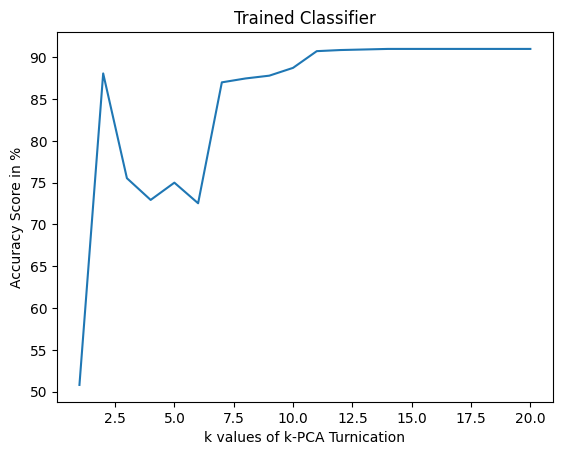

In [ ]:
#Create a vector of ground truth labels with an integer per class, e.g., 0 (walking), 1 (jumping), 2 (running)
#Assign an appropriate label to each sample in Xtrain
groundtruthlabel=np.zeros (1500)
groundtruthlabel [500:1000]=1
groundtruthlabel [1001:1500]=2
accuracyscore=np.zeros (20)

#then for each movement compute its centroid in k-modes PCA space.
for k in range (20):
  accuracyscore[k]=0
  centered_Xtrain = X_train-np.mean (X_train, axis=1) [:, None]
  dU, ds, dVt = np.linalg.svd (centered_Xtrain)
  dU4=dU
  dU4[:,k+1:None]=0
  projecteddata=np.dot (np.transpose(dU4) , centered_Xtrain)
  centroid=np. empty ((114,3))
  centroid[:,0]=np.mean (projecteddata [:, 0:500], axis=1)
  centroid[:,1]=np.mean (projecteddata [:,500:1000], axis=1)
  centroid[:,2]=np.mean (projecteddata[:, 1000:1500], axis=1)
  trainedlabel=np.empty ((1500))
  index=np. empty ((1500))

  for i in range (1500):
    distance0=distance. euclidean(projecteddata[:, i], centroid [: ,0])
    distance1=distance.euclidean(projecteddata[:, i], centroid [:, 1])
    distance2=distance. euclidean (projecteddata[:, i], centroid [: ,2])
    index[i]=np. argmin([distance0,distance1,distance2])
    if index[i]==0:
      trainedlabel[i]=0
    elif index[i] ==1 :
      trainedlabel[i]=1
    elif index[i] ==2 :
      trainedlabel[i]=2

#computing the accuracy of the trained classifier
  for i in range (1500):
    if trainedlabel[i]==groundtruthlabel [i]:
      accuracyscore[k]=accuracyscore[k]+1
  accuracyscore[k]=(accuracyscore[k]/1500)*100


print(accuracyscore)


grid=np.linspace (0,19,20)
plt. ylabel ("Accuracy Score in %")
plt. xlabel ("k values of k-PCA Turnication")
plt. title ("Trained Classifier")
plt.plot (grid+1,accuracyscore)

In [ ]:
#Compiling all the test samples into a matrix X_test
fnamet = ["jumping_1t","running_1t"]

# Define the folder where the motion data is stored
foldert = '/content/drive/MyDrive/test/'

# X_test=np.zeros (shape=[114,100])

X_test=np.load((foldert+"walking_1t"+".npy")) #initializing compile process

for namet in fnamet:
    value= np.load((foldert+namet+ ".npy"))
    X_test= np.hstack((X_test,value))



print("Shape of X_test:", X_test.shape)

print(X_test)

Shape of X_test: (114, 300)
[[ 2.42827624e-01  2.45365128e-01  2.41094857e-01 ...  1.77531764e-01
   1.57851726e-01  1.42297074e-01]
 [ 2.85913855e-01  2.88613588e-01  2.83028573e-01 ...  1.80369079e-01
   1.60872206e-01  1.45490125e-01]
 [-2.18093538e+00 -2.17966294e+00 -2.18155789e+00 ... -2.36745477e+00
  -2.37434077e+00 -2.37932444e+00]
 ...
 [ 3.60165874e+02  3.64784344e+02  3.67145441e+02 ...  2.48804368e+02
   2.47813551e+02  2.46440522e+02]
 [ 1.06292012e+02  1.02790175e+02  9.98899995e+01 ... -4.05616756e+01
  -4.03394527e+01 -4.01882410e+01]
 [-2.02219787e+02 -2.00055504e+02 -1.99814900e+02 ...  5.22519015e+01
   4.53690172e+01  4.03317131e+01]]


[0.33333333 0.48666667 0.98333333 0.92333333 0.74666667 0.91666667
 0.71666667 0.94333333 0.93       0.94333333 0.94333333 0.95333333
 0.95333333 0.95333333 0.95333333 0.95333333 0.95333333 0.95333333
 0.95333333 0.95333333]


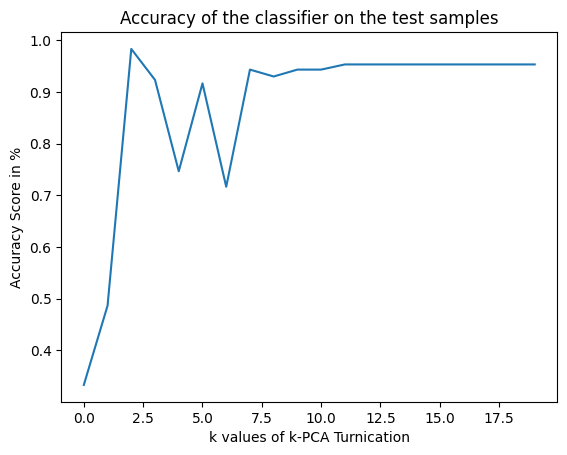

In [ ]:
#By projecting onto K-PCA space and computing the distance to the centroids, predict the test labels

groundtruthlabelt=np.zeros (shape=300)
groundtruthlabelt[100:200]=1
groundtruthlabelt[200:300]=2

accuracyscore1=np.zeros (20)
for k in range (20):
  accuracyscore1[k]=0
  centered_Xtest = X_test-np.mean (X_train, axis=1) [:, None]
  dUt, dst, dVtt = np.linalg.svd (centered_Xtrain)
  #dsd=np.diag(ds)
  dU5=dUt
  dU5[:,k:None]=0
  projecteddata=np.dot (np.transpose(dU5) , centered_Xtrain)
  centroid=np. zeros ((114,3))
  centroid[:,0]=np.mean (projecteddata [:, 0:500], axis=1)
  centroid[:,1]=np.mean (projecteddata [:,500:1000], axis=1)
  centroid[:,2]=np.mean (projecteddata[:, 1000:1500], axis=1)
  trainedlabelt=np.zeros ((300))
  index=np. zeros(shape=300)
  projecteddatatest=np.dot (np.transpose(dU5) , centered_Xtest)



  for i in range (300):
    distance0=distance. euclidean(projecteddatatest[:, i], centroid [: ,0])
    distance1=distance.euclidean(projecteddatatest[:, i], centroid [:, 1])
    distance2=distance. euclidean (projecteddatatest[:, i], centroid [: ,2])
    index[i]=np. argmin([distance0,distance1,distance2])
    if index[i]==0:
      trainedlabelt[i]=0
    elif index[i] ==1 :
      trainedlabelt[i]=1
    elif index[i] ==2 :
      trainedlabelt[i]=2
    else:
      trainedlabelt[i]=5
#Report the accuracy of the classifier on the test samples

    accuracyscore1[k]=accuracy_score(groundtruthlabelt,trainedlabelt)


print(accuracyscore1)
grid=np.linspace (0,19,20)
plt. ylabel ("Accuracy Score in %")
plt. xlabel ("k values of k-PCA Turnication")
plt. title ("Accuracy of the classifier on the test samples")
plt.plot (accuracyscore1)